## CurryMuch Food Image Detection + Segmentation

In [2]:
import os
import glob as glob
import requests
import shutil

import pandas as pd
import numpy as np

#CV
import cv2

#modelling 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model

#dataset preparation 
import sklearn
from sklearn.model_selection import train_test_split

#plotting 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# The notebook is supposed to run with TF 2.6.0
print(tf.__version__)
print(tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))

2.6.4
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-12-31 10:31:48.110691: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-31 10:31:49.268061: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 10:31:50.083299: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 10:31:50.083770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

# Benchmark Datasets

## UEC Food100

In [5]:
%cd /home/jupyter/currymuch/datasets/

/home/jupyter/currymuch/datasets


In [7]:
!pip install opendatasets
# !kaggle datasets download -d rkuo2000/uecfood100

In [8]:
import opendatasets as od
import pandas
 
od.download("https://www.kaggle.com/datasets/rkuo2000/uecfood100")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  lynxhal2020


Your Kaggle Key:

  ································


100% 946M/946M [00:07<00:00, 131MB/s]  


In [9]:
%cd /home/jupyter/currymuch/datasets/uecfood100/

/home/jupyter/currymuch/datasets/uecfood100


In [1]:
!python food_x_gen_bbox.py

/home/jupyter/currymuch/datasets/uecfood100
generating 1 rice
generating 2 eels-on-rice
generating 3 pilaf
generating 4 chicken-n-egg-on-rice
generating 5 pork-cutlet-on-rice
generating 6 beef-curry
generating 7 sushi
generating 8 chicken-rice
generating 9 fried-rice
generating 10 tempura-bowl
generating 11 bibimbap
generating 12 toast
generating 13 croissant
generating 14 roll-bread
generating 15 raisin-bread
generating 16 chip-butty
generating 17 hamburger
generating 18 pizza
generating 19 sandwiches
generating 20 udon-noodle
generating 21 tempura-udon
generating 22 soba-noodle
generating 23 ramen-noodle
generating 24 beef-noodle
generating 25 tensin-noodle
generating 26 fried-noodle
generating 27 spaghetti
generating 28 Japanese-style-pancake
generating 29 takoyaki
generating 30 gratin
generating 31 sauteed-vegetables
generating 32 croquette
generating 33 grilled-eggplant
generating 34 sauteed-spinach
generating 35 vegetable-tempura
generating 36 miso-soup
generating 37 potage
gener

train-test split

In [2]:
!python food100_split_for_yolo.py

convert names to yolov5 format

In [13]:
!python names2v5.py

converted all


## UEC Food256

In [9]:
od.download("https://www.kaggle.com/datasets/rkuo2000/uecfood256")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  lynxhal2020


Your Kaggle Key:

  ································


100% 3.94G/3.94G [00:33<00:00, 127MB/s] 


## AICrowd

In [12]:
!pip install aicrowd-cli > /dev/null
!aicrowd login

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
jupyter-client 7.3.4 requires pyzmq>=23.0, but you have pyzmq 22.1.0 which is incompatible.
flax 0.6.2 requires rich>=11.1, but you have rich 10.16.2 which is incompatible.
flask 2.2.2 requires click>=8.0, but you have click 7.1.2 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.
cached-path 1.1.6 requires rich<13.0,>=12.1, but you have rich 10.16.2 which is incompatible.
black 22.6.0 requires click>=8.0.0, but you have click 7.1.2 which is incompatible.
Please login here: https://api.aicrow

In [13]:
# List dataset for this challenge
!aicrowd dataset list -c food-recognition-benchmark-2022

                          Datasets for challenge #962                           
┌───┬───────────────────────────────┬───────────────────────────────┬──────────┐
│ # │ Title                         │ Description                   │     Size │
├───┼───────────────────────────────┼───────────────────────────────┼──────────┤
│ 0 │ random_prediction.json        │ Random prediction for Quick   │  4.36 MB │
│   │                               │ Submission into Round 2       │          │
│ 1 │ [Round 1]                     │ [Public] Testing Dataset      │     197M │
│   │ public_test_release_2.0.tar.… │ (contains 3000 images and 498 │          │
│   │                               │ categories, without           │          │
│   │                               │ annotations)                  │          │
│ 2 │ [Round 1]                     │ Training Dataset (contains    │   2.14GB │
│   │ public_training_set_release_… │ 39962 images and 498          │          │
│   │                       

In [14]:
%cd /home/jupyter/currymuch/datasets/aicrowd
# Download dataset
!aicrowd dataset download -c food-recognition-benchmark-2022 0 1 2 3 

/home/jupyter/currymuch/datasets/aicrowd
cfad74b4-d34b-4f13-96ee-da7ccd3c184a_predictions.json: 100%|█| 4.36M/4.36M [00:0
public_test_release_2.0.tar.gz:  44%|███    | 91.2M/207M [00:02<00:03, 31.0MB/s]
public_test_release_2.0.tar.gz:  48%|███▎   | 98.6M/207M [00:02<00:02, 37.8MB/s]
public_test_release_2.0.tar.gz:  52%|████▏   | 108M/207M [00:03<00:03, 28.4MB/s]
public_training_set_release_2.0.tar.gz:   0%| | 2.10M/2.30G [00:00<10:19, 3.71MB
public_test_release_2.0.tar.gz:  62%|████▉   | 129M/207M [00:03<00:01, 43.6MB/s]
public_training_set_release_2.0.tar.gz:   1%| | 12.6M/2.30G [00:01<02:49, 13.5MB
public_training_set_release_2.0.tar.gz:   1%| | 18.9M/2.30G [00:01<02:31, 15.1MB
public_test_release_2.0.tar.gz:  65%|█████▏  | 134M/207M [00:04<00:04, 16.7MB/s]
public_test_release_2.0.tar.gz:  70%|█████▌  | 145M/207M [00:05<00:03, 20.6MB/s]
public_test_release_2.0.tar.gz:  74%|█████▉  | 153M/207M [00:05<00:02, 24.0MB/s]
public_test_release_2.0.tar.gz:  81%|██████▍ | 167M/207M [00:05<00:0

extract the dataset

In [1]:
%cd /home/jupyter/currymuch/datasets/aicrowd/

/home/jupyter/currymuch/datasets/aicrowd


In [3]:
#!mkdir -p data/ data/train data/val data/test
!cp *test* data/test && cd data/test && echo "Extracting test dataset" && tar -xvf *test* > /dev/null
#!cp *val* data/val && cd data/val && echo "Extracting val dataset" &&  tar -xvf *val* > /dev/null
#!cp *train* data/train && cd data/train && echo "Extracting train dataset" &&  tar -xvf *train* > /dev/null

Extracting test dataset


## CurryMuch Dataset 

In [37]:
!conda install -y gdown

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    filelock-3.8.2             |     pyhd8ed1ab_0          14 KB  conda-forge
    gdown-4.6.0                |     pyhd8ed1ab_0          18 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         321 KB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.8.2-p

In [63]:
%cd /home/jupyter

/home/jupyter


In [64]:
#!gdown --version
#https://drive.google.com/file/d/1OVIb8WT0wWMkatPNi19LSCp8I6_T2N4r/view?usp=share_link
!gdown 1OVIb8WT0wWMkatPNi19LSCp8I6_T2N4r

Downloading...
From: https://drive.google.com/uc?id=1OVIb8WT0wWMkatPNi19LSCp8I6_T2N4r
To: /home/jupyter/food_all.zip
100%|██████████████████████████████████████| 1.06G/1.06G [00:12<00:00, 87.0MB/s]


In [65]:
#https://pypi.org/project/gdrivefs/
# !sudo apt-get install -y build-essential python-dev
# !pip install gdrivefs
# !gdfstool auth_get_url
#!gdfstool auth_automatic
# !gdfstool auth_write "4/1AWgavdeM1vc0AUmSfsz2HY9BR6pmo5N6HQlBQc-8gbwj4iO6lNZtdCI2CeA"
# !gdfs -o allow_other default mnt/gdrivefs
# !ls mnt/gdrivefs

In [3]:
data = pd.read_csv('/home/jupyter/currymuch/food_all_data.csv')
data

image        xmin        ymin        xmax  \
0                 0020f89e4cb5041d.jpg   82.000000  421.000000  390.000000   
1                 00222a71f3ae10ef.jpg  680.000000  257.000000  767.000000   
2                 002291454629e1a2.jpg    0.000000  373.000000  131.000000   
3                 0026c070b0edd913.jpg  310.000000  430.000000  890.000000   
4                 0027b41fcd4fa63d.jpg  355.000000  499.000000  481.000000   
...                                ...         ...         ...         ...   
13627  2701590465612.773563_0508_3.jpg  197.284404  273.321101  434.495413   
13628  2701590465612.773563_0508_3.jpg  184.366972  241.614679  314.715596   
13629  2701590465612.773563_0509_3.jpg  356.990826  106.568807  467.963303   
13630  2701590465612.773563_0509_3.jpg  170.862385  208.146789  382.238532   
13631  2701590465612.773563_0509_3.jpg  163.816514   96.587156  341.724771   

             ymax       label  
0      767.000000    Sandwich  
1      647.000000      Bottle  
2      672.000000      Bottle  
3      976.000000   Hamburger  
4      767.000000      Bottle  
...           ...         ...  
13627  473.541284  fried_rice  
13628  443.596330  fried_rice  
13629  247.486239     brinjal  
13630  413.064220  fried_rice  
13631  373.137615  fried_rice  

[13632 rows x 6 columns]

In [13]:
len(data['label'].value_counts())

30

In [4]:
data['label'].value_counts()

fish             978
rice             947
carrot           867
green            776
chicken          768
papadum          764
potato           706
egg              699
bean             647
Doughnut         609
dhal             603
Bottle           569
fried_rice       560
string_hopper    460
brinjal          448
noodles          420
Sandwich         413
chickpea         400
Hamburger        321
patties          311
roll             289
samosa           252
burger           180
pastry           164
cup_cake         132
fish_bun         117
cake_slice       108
cutlet            86
omlet             19
hot_dog           19
Name: label, dtype: int64

get only the pastries dataset

In [16]:
dff = data[data['label'] == 'Bottle']
dff

image   xmin   ymin   xmax   ymax   label
1     00222a71f3ae10ef.jpg  680.0  257.0  767.0  647.0  Bottle
2     002291454629e1a2.jpg    0.0  373.0  131.0  672.0  Bottle
4     0027b41fcd4fa63d.jpg  355.0  499.0  481.0  767.0  Bottle
5     0027b41fcd4fa63d.jpg  701.0  517.0  823.0  735.0  Bottle
6     002d7d220a042075.jpg  752.0  218.0  827.0  520.0  Bottle
...                    ...    ...    ...    ...    ...     ...
1680  fde69c7d63d1d9b8.jpg  603.0  578.0  754.0  786.0  Bottle
1687  ff034be887792a8c.jpg  152.0  303.0  314.0  473.0  Bottle
1688  ff034be887792a8c.jpg  184.0  470.0  323.0  662.0  Bottle
1689  ff14b3d8c4514c28.jpg  446.0    0.0  597.0  249.0  Bottle
1690  ff14b3d8c4514c28.jpg  650.0    0.0  829.0  235.0  Bottle

[569 rows x 6 columns]

In [17]:
labels = ['papadum', 'chicken', 'fish', 'egg', 'Doughnut','Sandwich', 'Hamburger', 'patties', 'roll', 'samosa', 'burger', 'pastry', 'cup_cake', 'fish_bun', 'cake_slice', 'cutlet']
dt = data[data['label'].isin(labels)]
dt

image        xmin        ymin        xmax  \
0              0020f89e4cb5041d.jpg   82.000000  421.000000  390.000000   
3              0026c070b0edd913.jpg  310.000000  430.000000  890.000000   
9              004903710bc67e93.jpg  282.000000  381.000000  561.000000   
10             004903710bc67e93.jpg  361.000000   72.000000  601.000000   
68             00896f32ba923ded.jpg  289.000000  316.000000  472.000000   
...                             ...         ...         ...         ...   
10927  1579670191.463133_0049_3.jpg  329.300719   66.302158  510.526619   
10928  1579670191.463133_0050_3.jpg  338.877698  192.276259  503.159712   
10929  1579670191.463133_0051_3.jpg  252.684892  265.945324  483.269065   
10930  1579670191.463133_0052_3.jpg   97.979856  311.620144  358.031655   
11387  1580103724.073119_0131_3.jpg  374.238849  220.270504  453.801439   

             ymax      label  
0      767.000000   Sandwich  
3      976.000000  Hamburger  
9      561.000000   Sandwich  
10     195.000000   Sandwich  
68     614.000000   Sandwich  
...           ...        ...  
10927  274.048921    papadum  
10928  425.807194    papadum  
10929  480.322302    papadum  
10930  464.115108    papadum  
11387  314.566906       fish  

[6191 rows x 6 columns]

correct labelling mistakes (duplicates and spelling mistakes)

In [18]:
dt['label'] = dt['label'].replace(['Hamburger'], 'burger')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
dt['label'].value_counts()
n_classes = len(dt['label'].value_counts()) 
n_classes

15

shuffle the dataset

In [20]:
shuf = dt.sample(frac=1)
shuf.reset_index(drop=True, inplace=True)
shuf 

image        xmin        ymin         xmax  \
0     sri%20lankan%20rolls_152.jpg  883.163910  260.606851  1283.436341   
1                        0HTVO.jpg  343.150388  119.420716   475.327997   
2             211f707734773f81.jpg    0.000000  381.000000   150.000000   
3     1578988530.307078_0318_3.jpg  310.146763  155.441727   470.008633   
4       1572579653.4777_2044_3.jpg   29.467626  173.858993   149.548201   
...                            ...         ...         ...          ...   
6186  sri%20lankan%20patis_142.jpg  141.578404  199.172293   354.046774   
6187  1579668931.543347_0017_3.jpg  153.231655  164.282014   374.975540   
6188    1572579653.4777_0379_3.jpg  214.376978  257.841727   315.303597   
6189                     0A3TV.jpg  133.063289  204.046590   379.418635   
6190                     0EKJ0.jpg  228.972608  104.644774   472.372762   

            ymax       label  
0     585.958968        roll  
1     327.089948  cake_slice  
2     531.000000    Doughnut  
3     326.353957     chicken  
4     265.945324        fish  
...          ...         ...  
6186  424.264128     patties  
6187  310.146763     papadum  
6188  381.605755        fish  
6189  423.536529        roll  
6190  284.911337        roll  

[6191 rows x 6 columns]

save dataset as shorteats.csv

In [21]:
def write_csv(df, st):
  import os  
  #os.makedirs(f'/content/drive/MyDrive/L4S1/afr_train_test/', exist_ok=True)    
  df.to_csv(f'/home/jupyter/currymuch/{st}.csv')

In [22]:
def make_cols(csv):
    csv = csv.copy()
    #csv["valid"] = [True for i in range(len(csv))]
    csv["img_width"] = [0 for i in range(len(csv))]
    csv["img_height"] = [0 for i in range(len(csv))]
    return csv

In [23]:
shufcols = make_cols(shuf)
shufcols

image        xmin        ymin         xmax  \
0     sri%20lankan%20rolls_152.jpg  883.163910  260.606851  1283.436341   
1                        0HTVO.jpg  343.150388  119.420716   475.327997   
2             211f707734773f81.jpg    0.000000  381.000000   150.000000   
3     1578988530.307078_0318_3.jpg  310.146763  155.441727   470.008633   
4       1572579653.4777_2044_3.jpg   29.467626  173.858993   149.548201   
...                            ...         ...         ...          ...   
6186  sri%20lankan%20patis_142.jpg  141.578404  199.172293   354.046774   
6187  1579668931.543347_0017_3.jpg  153.231655  164.282014   374.975540   
6188    1572579653.4777_0379_3.jpg  214.376978  257.841727   315.303597   
6189                     0A3TV.jpg  133.063289  204.046590   379.418635   
6190                     0EKJ0.jpg  228.972608  104.644774   472.372762   

            ymax       label  img_width  img_height  
0     585.958968        roll          0           0  
1     327.089948  cake_slice          0           0  
2     531.000000    Doughnut          0           0  
3     326.353957     chicken          0           0  
4     265.945324        fish          0           0  
...          ...         ...        ...         ...  
6186  424.264128     patties          0           0  
6187  310.146763     papadum          0           0  
6188  381.605755        fish          0           0  
6189  423.536529        roll          0           0  
6190  284.911337        roll          0           0  

[6191 rows x 8 columns]

In [13]:
write_csv(shufcols, 'shorteats3')

unzip the image folder

In [72]:
import zipfile
with zipfile.ZipFile('/home/jupyter/currymuch/food_all.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/jupyter/currymuch/datasets')

In [92]:
image_folder = '/home/jupyter/currymuch/datasets/food_all/'
def get_shape_img(df):
    df = df.copy()
    for row in range(len(df)):
        img = cv2.imread(image_folder+str(df['image'][row]))
        if img is None:
            print('could not read image!')
            return
        df["img_width"][row] = img.shape[1]
        df["img_height"][row] = img.shape[0]
    print('image shape added!')
    return df

In [94]:
short_shape = get_shape_img(shufcols)
short_shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


image shape added!


image        xmin        ymin         xmax  \
0                        0APG6.jpg   93.033915  182.554306   415.418209   
1     1567668035.387374_0361_2.jpg  102.748201   70.805755   281.093525   
2     1578976328.983514_0073_3.jpg  209.220144    5.893525   329.300719   
3                        0BM79.jpg   78.526624  281.956144   266.852767   
4      sri%20lankan%20rolls_30.jpg  286.051119   68.076521   435.100529   
...                            ...         ...         ...          ...   
3714  1567668035.387374_0593_2.jpg  178.345324  274.172662   308.776978   
3715          7f16553eefd23768.jpg    0.000000    1.000000  1023.000000   
3716               hamburger_1.jpg  349.113647  186.588728  2260.541421   
3717          36b3752a0906d3c0.jpg  404.000000  222.000000  1023.000000   
3718          0d4cc4128ca0e375.jpg  518.000000   57.000000   679.000000   

             ymax      label  img_width  img_height  
0      343.477823     pastry        512         512  
1      253.410072        egg        370         370  
2      108.293525        egg        512         512  
3      477.535932     samosa        512         512  
4      159.739871       roll        550         367  
...           ...        ...        ...         ...  
3714   363.079137        egg        370         370  
3715   727.000000   Sandwich       1024         768  
3716  1414.262175  Hamburger       2540        1650  
3717   669.000000   Doughnut       1024         768  
3718   239.000000  Hamburger        680        1024  

[3719 rows x 8 columns]

In [96]:
def add_box_coords (csv):
  csv = csv.copy()
  csv["x"] = ((csv.xmin + csv.xmax)/2) / csv["img_width"]
  csv["y"] = ((csv.ymin + csv.ymax)/2) / csv["img_height"]

  csv["w"] = (csv.xmax - csv.xmin) / csv["img_width"]
  csv["h"] = (csv.ymax - csv.ymin) / csv["img_height"]

  csv.label = pd.Categorical(csv.label)
  csv['code'] = csv.label.cat.codes

  csv.sort_values(by=["image"], inplace=True)

  return csv

In [98]:
short_box = add_box_coords(short_shape)
short_box.reset_index(drop=True, inplace=True)
short_box

image        xmin        ymin        xmax  \
0                       000GY.jpg  197.808812   72.943642  443.626855   
1                       000GY.jpg  182.495545  220.165813  457.596841   
2            0020f89e4cb5041d.jpg   82.000000  421.000000  390.000000   
3            0026c070b0edd913.jpg  310.000000  430.000000  890.000000   
4            004903710bc67e93.jpg  282.000000  381.000000  561.000000   
...                           ...         ...         ...         ...   
3714  sri%20lankan%20rolls_26.jpg   64.818999  227.783294  196.709634   
3715  sri%20lankan%20rolls_30.jpg  248.885081   11.460925  409.873837   
3716  sri%20lankan%20rolls_30.jpg  286.051119   68.076521  435.100529   
3717  sri%20lankan%20rolls_30.jpg  304.152737  125.462397  458.016421   
3718  sri%20lankan%20rolls_30.jpg  333.230842  173.219753  466.489523   

            ymax       label  img_width  img_height         x         y  \
0     217.479251  cake_slice        512         512  0.626402  0.283616   
1     373.298338     patties        512         512  0.625090  0.579555   
2     767.000000    Sandwich        768         768  0.307292  0.773438   
3     976.000000   Hamburger       1024        1024  0.585938  0.686523   
4     561.000000    Sandwich       1024         683  0.411621  0.689605   
...          ...         ...        ...         ...       ...       ...   
3714  532.537191        roll        800         600  0.163455  0.633600   
3715  108.323661        roll        550         367  0.598872  0.163194   
3716  159.739871        roll        550         367  0.655592  0.310377   
3717  222.132568        roll        550         367  0.692881  0.473563   
3718  268.156804        roll        550         367  0.727019  0.601330   

             w         h  code  
0     0.480113  0.282296     3  
1     0.537307  0.299087    11  
2     0.401042  0.450521     2  
3     0.566406  0.533203     1  
4     0.272461  0.263543     2  
...        ...       ...   ...  
3714  0.164863  0.507923    12  
3715  0.292707  0.263931    12  
3716  0.270999  0.249764    12  
3717  0.279752  0.263406    12  
3718  0.242289  0.258684    12  

[3719 rows x 13 columns]

In [101]:
image_folder = '/home/jupyter/currymuch/datasets/food_all/'
output_folder = "/home/jupyter/currymuch/datasets/yolo_imgs"

def write_yolo_data(csv):
    csv = csv.copy()
    # write .names file
    names = {}
    for code in csv.code.unique():
        names[code] = csv[csv.code == code].iloc[0]["label"]
    with open(os.path.join(output_folder, "classes.names"), "w") as output:
        for i in range(len(names)):
            output.write(str(names[i]))
            output.write("\n")
            
 # write list of images file
    with open(os.path.join(output_folder, "train.txt"), "w") as output:
        for name in csv.image.unique():
            output.write("data/images/")
            output.write(name)
            output.write("\n")

    # write yolo data
    for name in csv.image.unique():
        # if copy_images:
        shutil.copy(os.path.join(image_folder, name), os.path.join(output_folder, name))
        with open(os.path.join(output_folder, os.path.splitext(name)[0]) + ".txt", "w") as output:
            for i, row in csv[csv.image == name].iterrows():
                output.write(str(row["code"]))
                output.write(" ")
                output.write(str(row["x"]))
                output.write(" ")
                output.write(str(row["y"]))
                output.write(" ")
                output.write(str(row["w"]))
                output.write(" ")
                output.write(str(row["h"]))
                output.write("\n")
                
    print('yolo data written to'+output_folder)

In [102]:
write_yolo_data(short_box)

yolo data written to/home/jupyter/currymuch/datasets/yolo_imgs


In [9]:
# %cd '/home/jupyter/currymuch/datasets/shorteats'
# %ls -1 | wc -l 
#!find /home/jupyter/currymuch/datasets/yolo_imgs -name "*.names"

/home/jupyter/currymuch/datasets/yolo_imgs/classes.names


In [19]:
import zipfile

def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file), 
                       os.path.relpath(os.path.join(root, file), 
                                       os.path.join(path, '..')))

for n in range (1,3):
    with zipfile.ZipFile('/home/jupyter/currymuch/datasets/part/3_'+str(n)+'.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
        zipdir('/home/jupyter/currymuch/datasets/part/yolo_imgs_3_'+str(n), zipf)

#### split the dataset

In [20]:
%cd /home/jupyter/currymuch/datasets/part/yolo_imgs_3
%ls -1 | wc -l 

/home/jupyter/currymuch/datasets/part/yolo_imgs_3
361


In [21]:
# import os, os.path, shutil

# folder_path = "/home/jupyter/currymuch/datasets/part/yolo_imgs_3"
# new_dir = "/home/jupyter/currymuch/datasets/part/"

# images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# fcnt =0
# fol = 1
# for image in images:
#     fcnt = fcnt + 1
#     if fcnt <= 181:
#         folder_name = "yolo_imgs_3_"+str(fol)
#         new_path = os.path.join(new_dir, folder_name)
#         if not os.path.exists(new_path):
#             os.makedirs(new_path)
#         old_image_path = os.path.join(folder_path, image)
#         new_image_path = os.path.join(new_path, image)
#         shutil.copy(old_image_path, new_image_path)
#     else:
#         fol = fol + 1
#         fcnt = 0 

In [ ]:
tr = int(shuf.shape[0]*0.7)
val = int(shuf.shape[0]*0.8)

past_train = shuf[:tr]
past_val = shuf[tr:val]
past_test = shuf[val:]

past_train.reset_index(drop=True, inplace=True)
past_val.reset_index(drop=True, inplace=True)
past_test.reset_index(drop=True, inplace=True)

past_val

#### write to training and testing CSV files

In [ ]:
write_csv(past_train,'train')
write_csv(past_val,'val')
write_csv(past_test,'test')

### Loading Currymuch Dataset

In [3]:
%ls

'CurryMuch Contribution.ipynb'   afr_shorteats.zip   maskrcnn_data/
 MaskR-CNN.ipynb                 bar.png             pycocotools.egg-info/
 Mask_RCNN/                      cocoapi/            roboflow_test/
 Retina.ipynb                    currymuch/          uecfood_test/
 Untitled.ipynb                  mask_rcnn_coco.h5   yolov5/


In [4]:
!pip install roboflow

%cd /home/jupyter/currymuch/datasets/

from roboflow import Roboflow
rf = Roboflow(api_key="SXwDlxq023XK15DqysA5")
project = rf.workspace("afr").project("afr")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 24.9 MB/s eta 0:00:00
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9320 sha256=83917d6b03a88f29da7f3332e083443ed69382e5a92d860902855bea3be3d37d
  Stored in directory: /root/.cache/pip/wheels/d7/3c/72/5300602ba1269ffce8cff5dcf7b525fee756b57455903c37ba
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=22ddaa4d701fd679d50

Extracting Dataset Version Zip to AFR-1 in yolov5pytorch:: 100% 6500/6500 [00:01<00:00, 4919.90it/s]


# Model Configuration

## YOLOv5

In [1]:
#!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -r requirements.txt  # install

/home/jupyter/yolov5
Note: you may need to restart the kernel to use updated packages.


In [3]:
# import torch

# # Model
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6, custom

# # Images
# img = 'https://ultralytics.com/images/zidane.jpg'  # or file, Path, PIL, OpenCV, numpy, list

# # Inference
# results = model(img)

# # Results
# results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

In [64]:
# !pip install roboflow

In [3]:
import torch

from IPython.display import Image, clear_output  # to display images
#from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.11.0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', major=7, minor=0, total_memory=16160MB, multi_processor_count=80)


Below is the original YOLO Configuration

In [57]:
%cat /home/jupyter/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

customize iPython writefile so we can write variables

In [1]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [4]:
%%writetemplate /home/jupyter/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [9]:
%ls

CITATION.cff               README.zh-CN.md  export.py         setup.cfg
CONTRIBUTING.md            benchmarks.py    hubconf.py        train.py
Food-Object-Detection--1/  classify/        models/           tutorial.ipynb
LICENSE                    data/            requirements.txt  utils/
README.md                  detect.py        segment/          val.py


# Model Training 

## Update YOLOv5

In [ ]:
%cd /home/jupyter/yolov5
!git pull
%pip install -r requirements.txt 

## YOLOv5 for UECFood100 Dataset

In [101]:
%%time
%cd /home/jupyter/yolov5
!python train.py --img 416 --batch 16 --epochs 1000 --data /home/jupyter/currymuch/datasets/uecfood100-shorteats/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_results  --cache

/home/jupyter/yolov5
wandb: Currently logged in as: rukshankr (fit-afr). Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/home/jupyter/currymuch/datasets/uecfood100-shorteats/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-53-g65071da Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla V100-SXM2-16GB, 16161MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



    432/999         2G    0.01906    0.01079   0.008655          3        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        388        388      0.888       0.86      0.907      0.668

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    433/999         2G    0.01876    0.01052   0.006172          5        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        388        388      0.878      0.866      0.907      0.667

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    434/999         2G    0.01866    0.01044   0.007324          4        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        388        388       0.86      0.886      0.903      0.663

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    435/99

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



    507/999      2.02G    0.01809    0.01011   0.005851          6        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        388        388      0.854      0.875      0.899      0.666

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    508/999      2.02G    0.01767     0.0102   0.005944          4        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        388        388      0.852      0.872      0.899      0.666

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    509/999      2.02G    0.01813   0.009955   0.006697          5        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        388        388      0.851      0.871      0.897      0.663

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    510/99

### Validation

In [62]:
!python val.py --data /home/jupyter/currymuch/datasets/uecfood100-shorteats/data.yaml --weights runs/train/yolov5s_results12/weights/best.pt --save-txt

val: data=/home/jupyter/currymuch/datasets/uecfood100/data.yaml, weights=['runs/train/yolov5s_results6/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-53-g65071da Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla V100-SXM2-16GB, 16161MiB)

Fusing layers... 
YOLOv5s_custom summary: 182 layers, 7513521 parameters, 0 gradients
val: Scanning /home/jupyter/currymuch/datasets/uecfood100/test.cache... 3590 ima
val: WARNING ⚠️ /home/jupyter/currymuch/datasets/uecfood100/images/1/87.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/jupyter/currymuch/datasets/uecfood100/images/16/1581.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/jupyter/currymuch/datasets/uecfood100/images/30/2902.jpg: corrupt JPEG restored and saved


### Testing

In [ ]:
!python val.py --data {dataset.location}/data.yaml --task test --weights runs/train/yolov5s_results10/weights/best.pt --save-txt

### Prediction

In [77]:
!python detect.py --weights runs/train/yolov5s_results11/weights/best.pt --img 416 --conf 0.1 --source /home/jupyter/roboflow_test --save-crop
#--visualize

detect: weights=['runs/train/yolov5s_results11/weights/best.pt'], source=/home/jupyter/roboflow_test, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-53-g65071da Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla V100-SXM2-16GB, 16161MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/18 /home/jupyter/roboflow_test/00.jpg: 256x416 1 sushi, 1 sandwiches, 18.3ms
image 2/18 /home/jupyter/roboflow_test/0FNSZ.jpg: 416x416 (no detections), 11.5ms
image 3/18 /home/jupyter/roboflow_test/0GYFO.jpg: 416x416 1 croissant, 1 sirloin-cutlet, 10.4ms
image 4/18 /home/jupyter/roboflow_test/100s.jpg: 256x416

In [18]:
#display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp4/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

## YOLOv5 for CurryMuch Dataset (with Early Stopping)

In [ ]:
%%time
%cd /home/jupyter/yolov5
!python train.py --img 640 --batch 16 --epochs 1000 --data /home/jupyter/currymuch/datasets/AFR-1/data.yaml --cfg ./models/yolov5m.yaml --weights yolov5m.pt --name yolov5s_chng_archi --cache --patience  300

/home/jupyter/yolov5
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5m.pt, cfg=./models/yolov5m.yaml, data=/home/jupyter/currymuch/datasets/AFR-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_chng_archi, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=300, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to up

### early stopping criteria:

Stopping training early as no improvement observed in last 100 epochs. Best results observed at epoch 210, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `python train.py --patience 300` or use `--patience 0` to disable EarlyStopping.

311 epochs completed in 1.593 hours.

### Testing

In [25]:
!python val.py --data {dataset.location}/data.yaml --task test --weights runs/train/yolov5s_results10/weights/best.pt --save-txt

val: data=/home/jupyter/currymuch/datasets/AFR-1/data.yaml, weights=['runs/train/yolov5s_results10/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-53-g65071da Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla V100-SXM2-16GB, 16161MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
test: Scanning /home/jupyter/currymuch/datasets/AFR-1/test/labels.cache... 212 i
                 Class     Images  Instances          P          R      mAP50   
                   all        212        391      0.715      0.789      0.758      0.578
              Doughnut        212         73      0.561      0.472      0.436      0.348
             Hamburger        212         54      0.768      0.796     

### Prediction

In [44]:
occlusion_test_set("runs/train/yolov5s_results10/weights/best.pt", 640, 0.1, "/home/jupyter/roboflow_test")

/home/jupyter/yolov5
detect: weights=['runs/train/yolov5s_results10/weights/best.pt'], source=/home/jupyter/roboflow_test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-53-g65071da Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla V100-SXM2-16GB, 16161MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/18 /home/jupyter/roboflow_test/00.jpg: 384x640 1 Doughnut, 16.6ms
image 2/18 /home/jupyter/roboflow_test/0FNSZ.jpg: 640x640 1 samosa, 9.2ms
image 3/18 /home/jupyter/roboflow_test/0GYFO.jpg: 640x640 2 samosas, 8.2ms
image 4/18 /home/jupyter/roboflow_test/100s.jpg: 384x640 1 Sandwich, 10.5ms

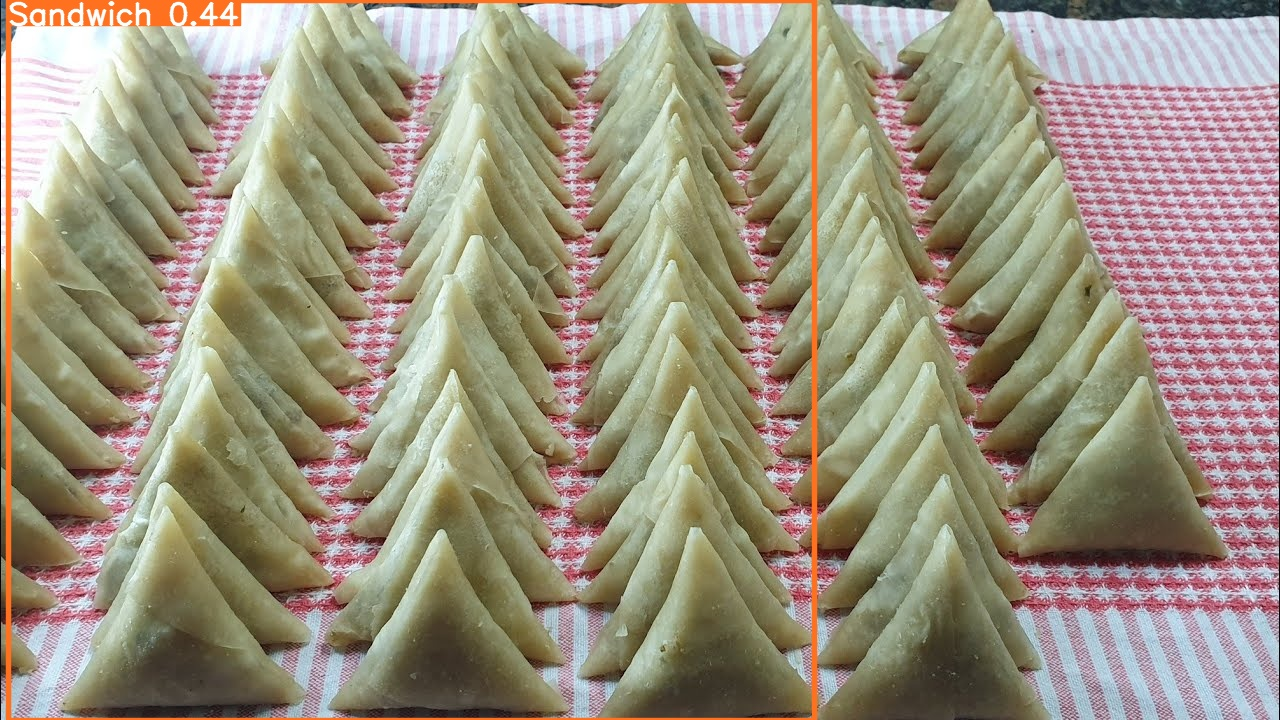

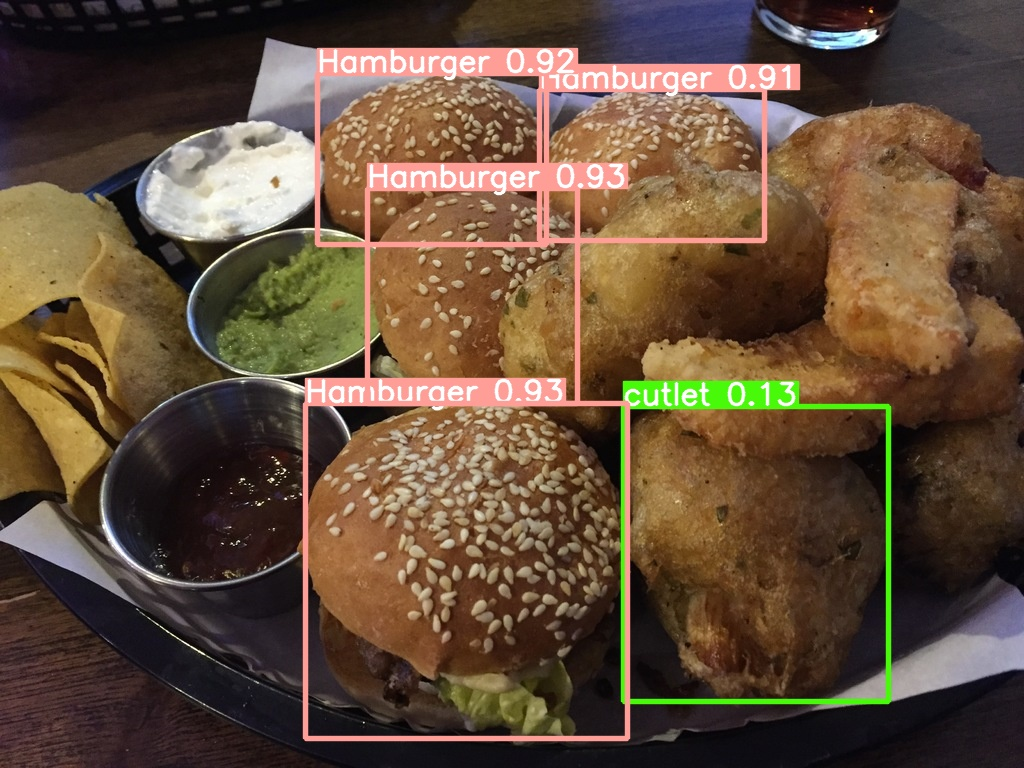

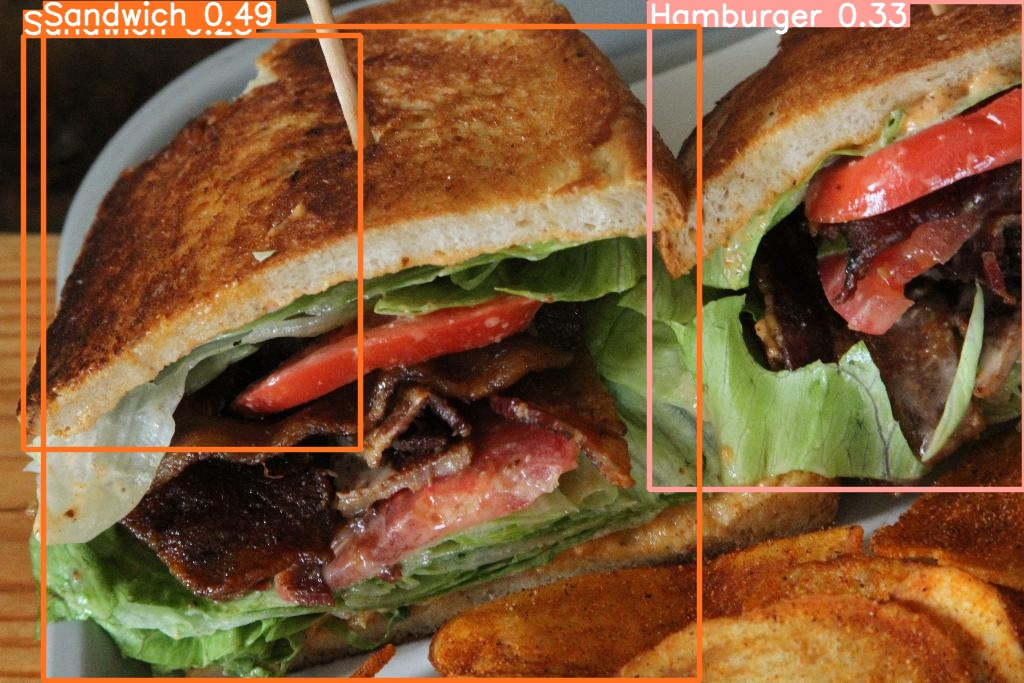

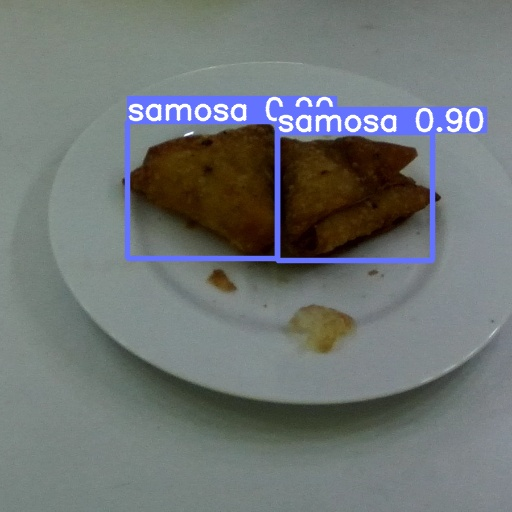

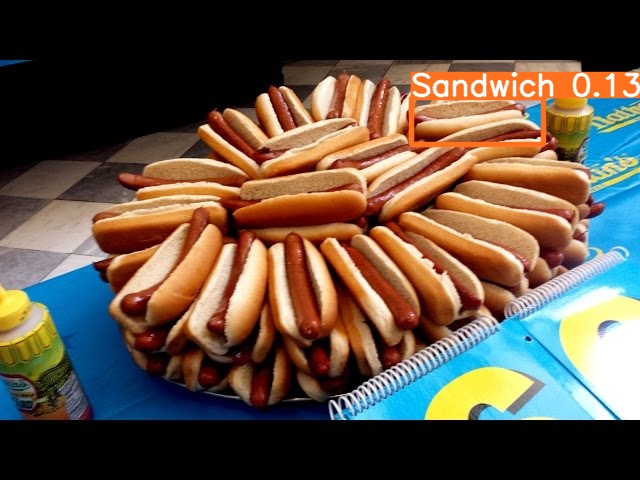

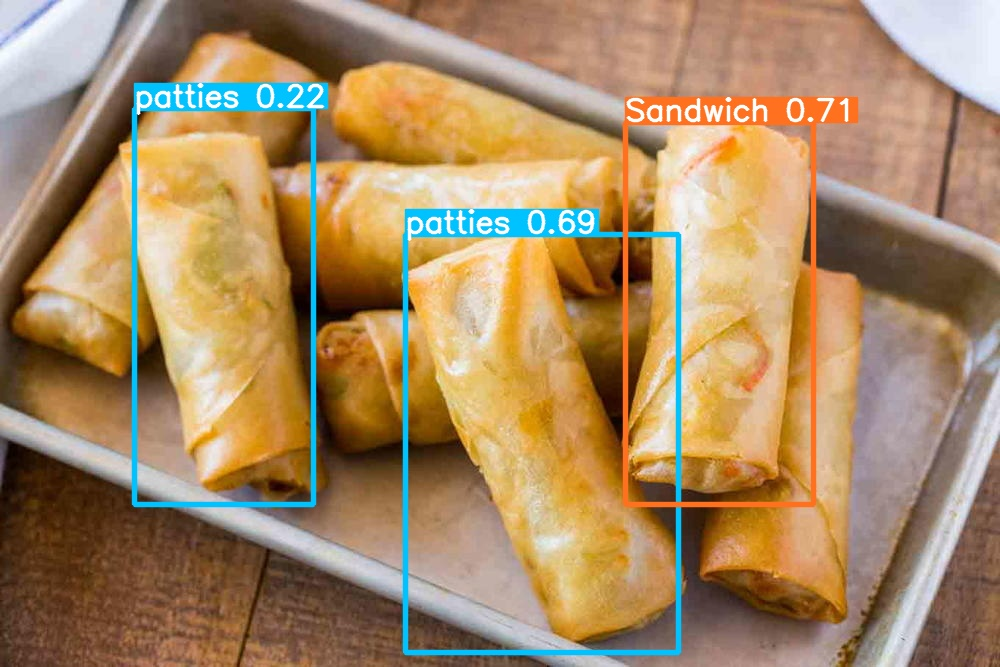

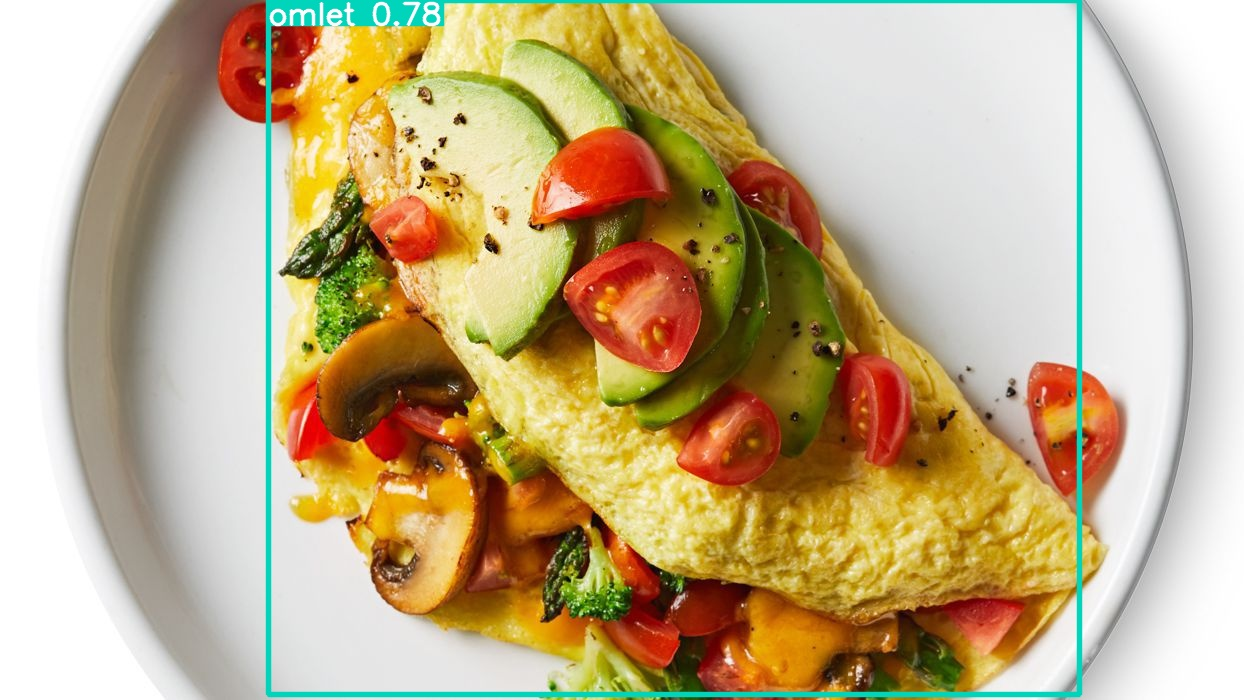

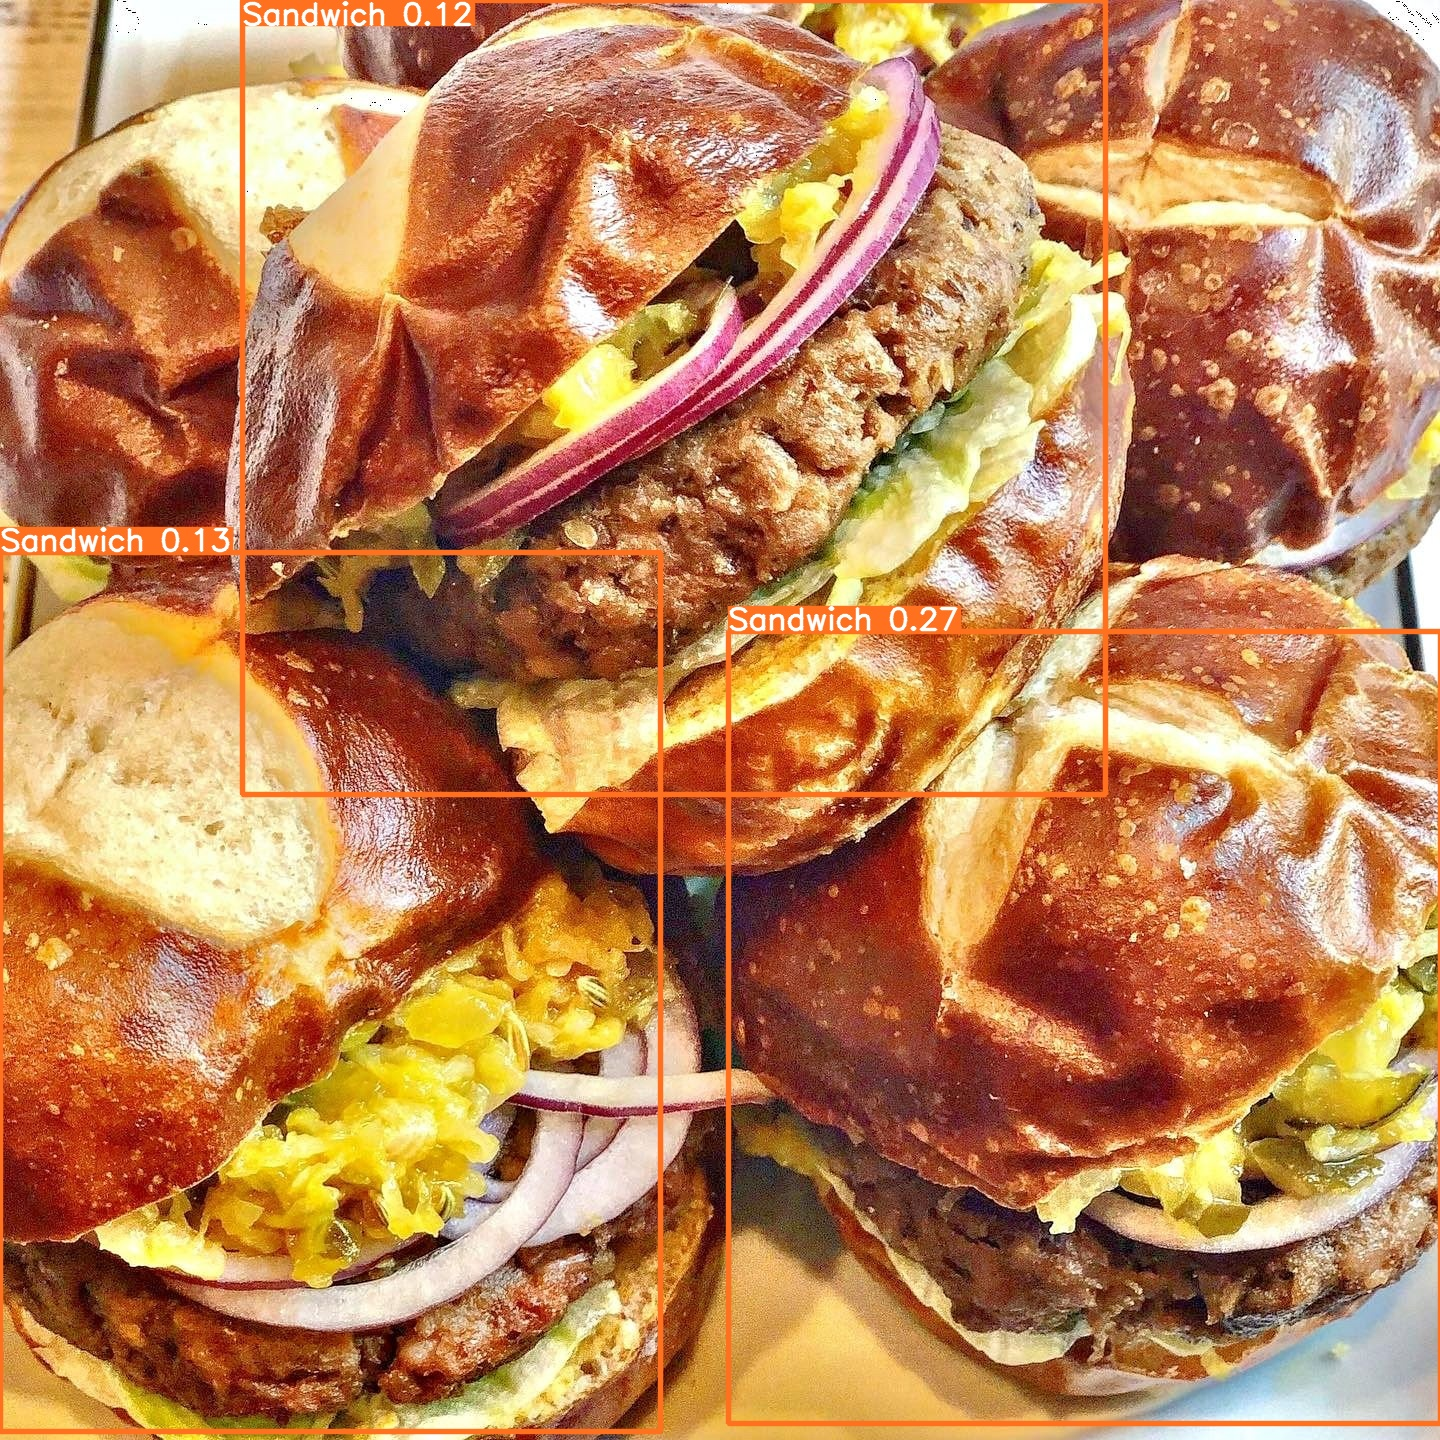

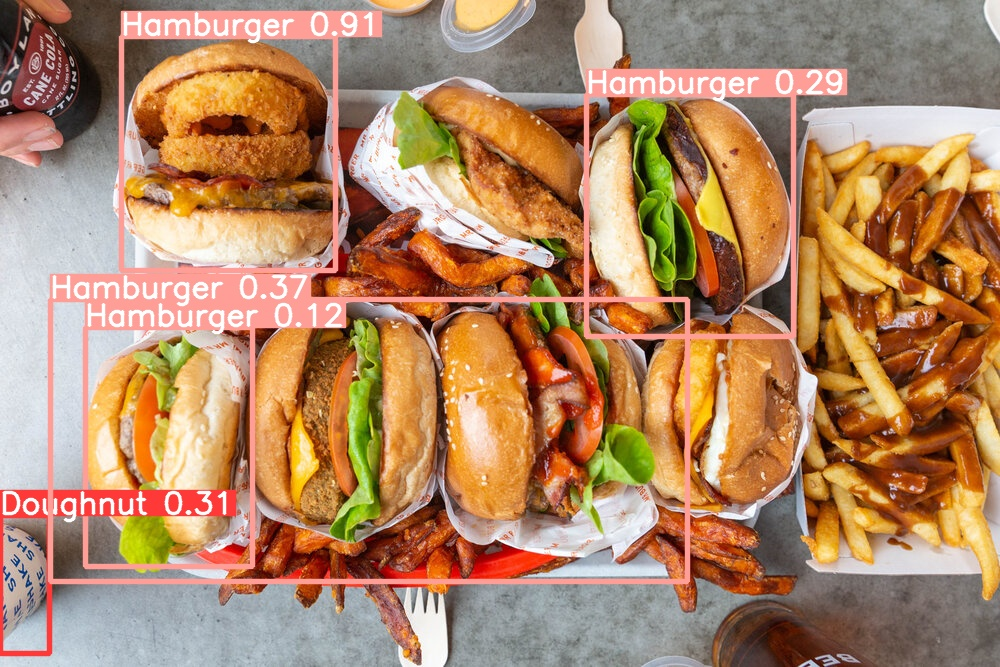

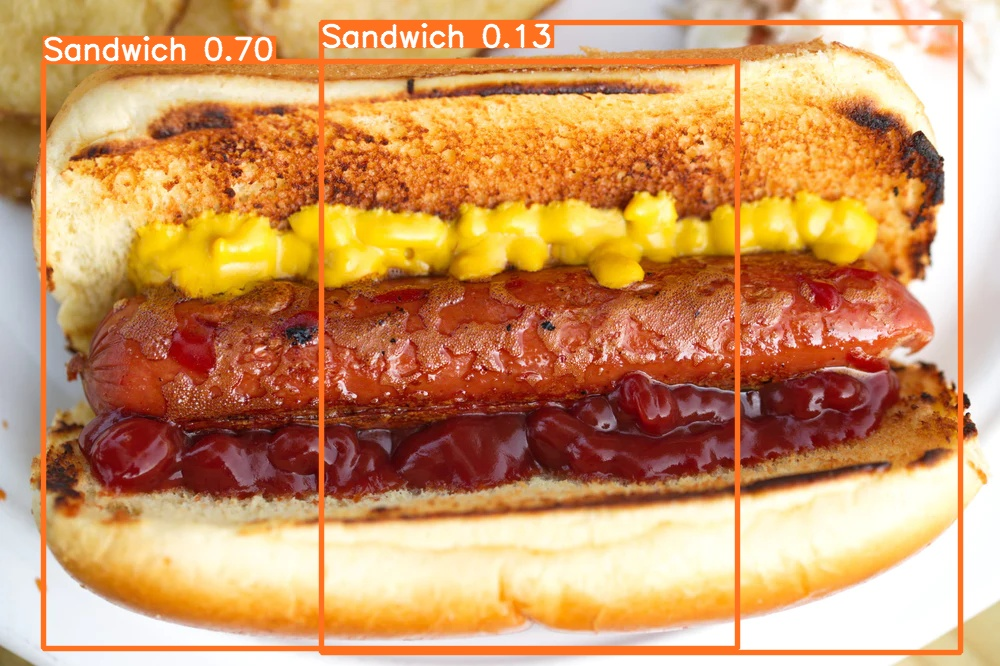

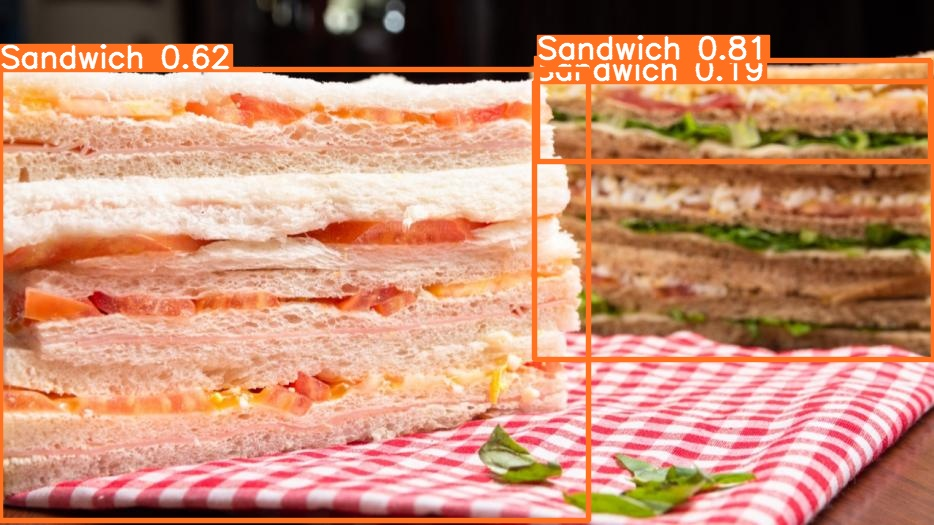

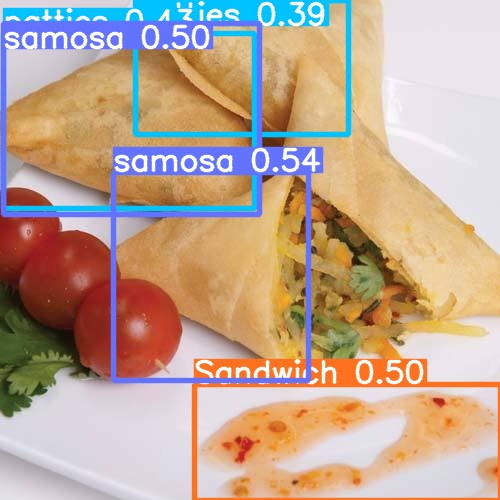

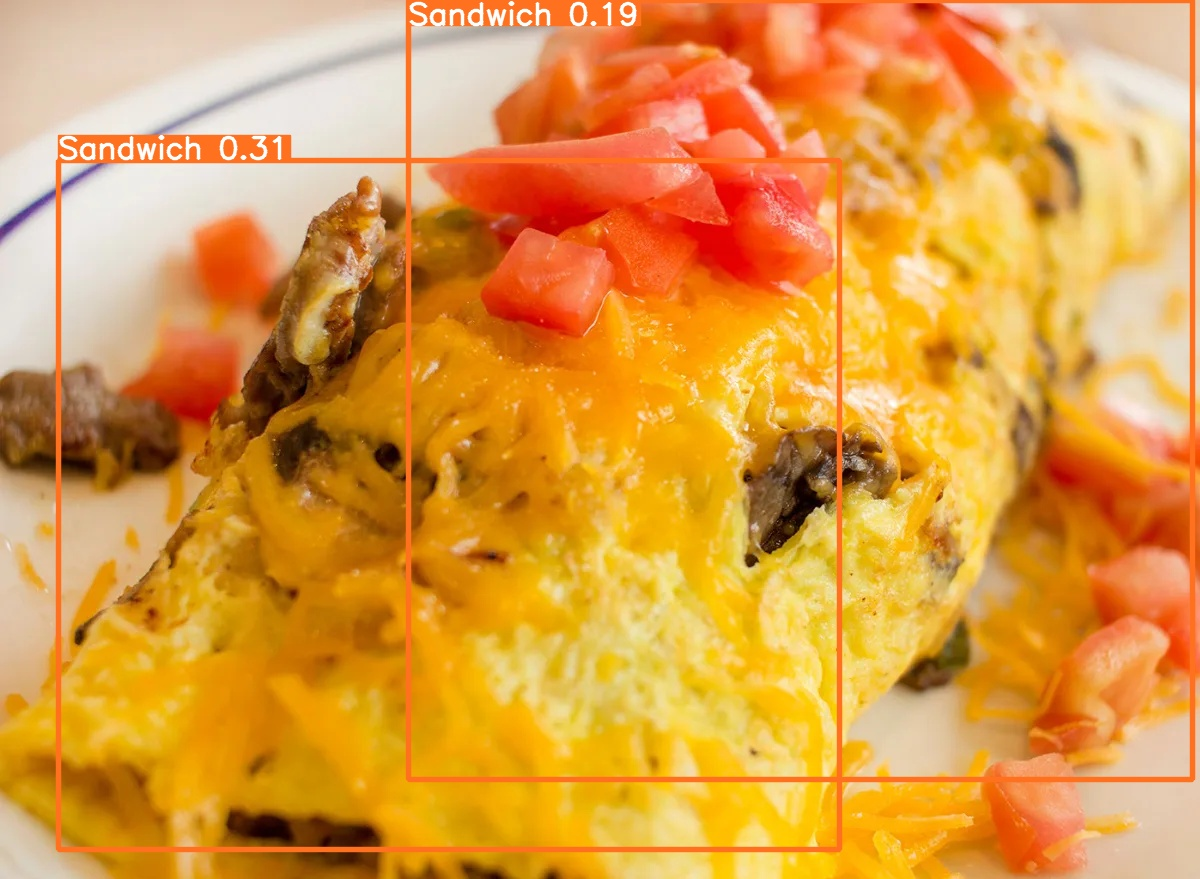

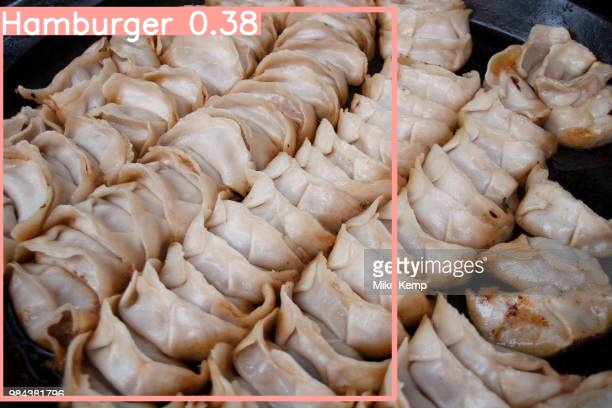

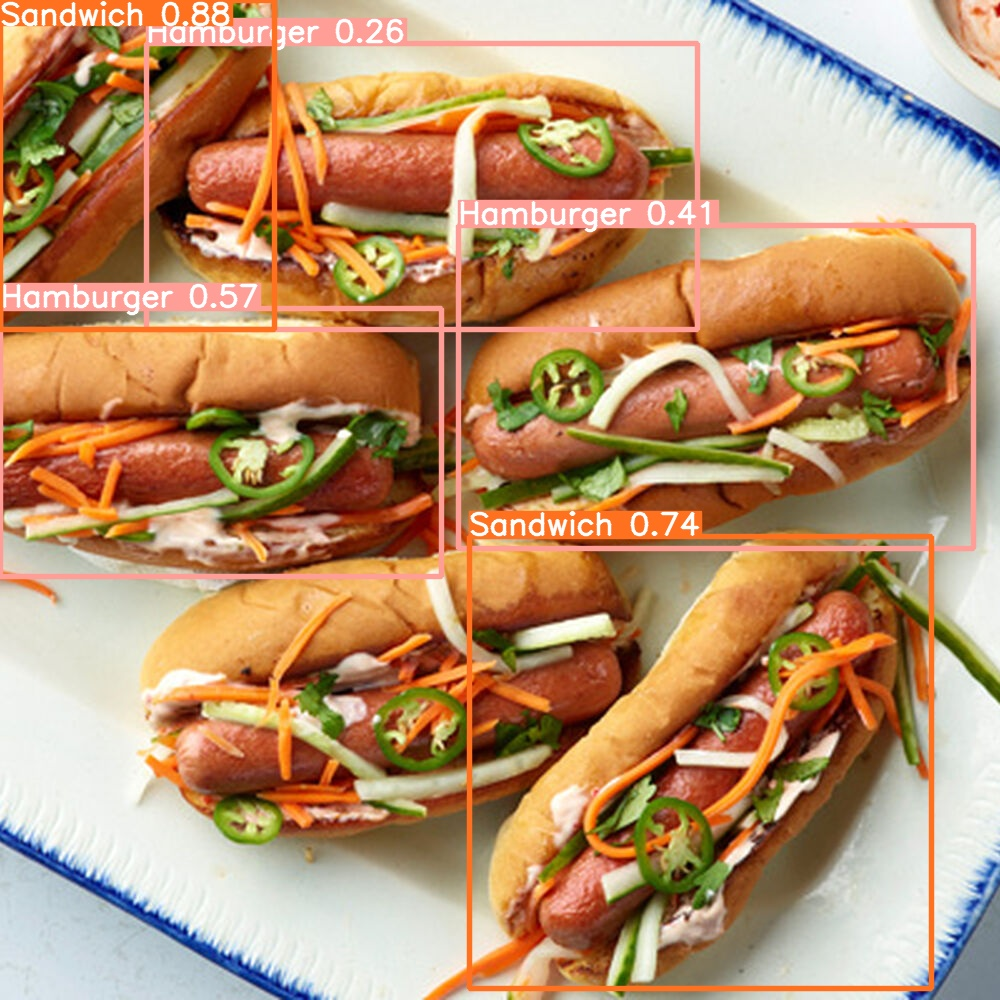

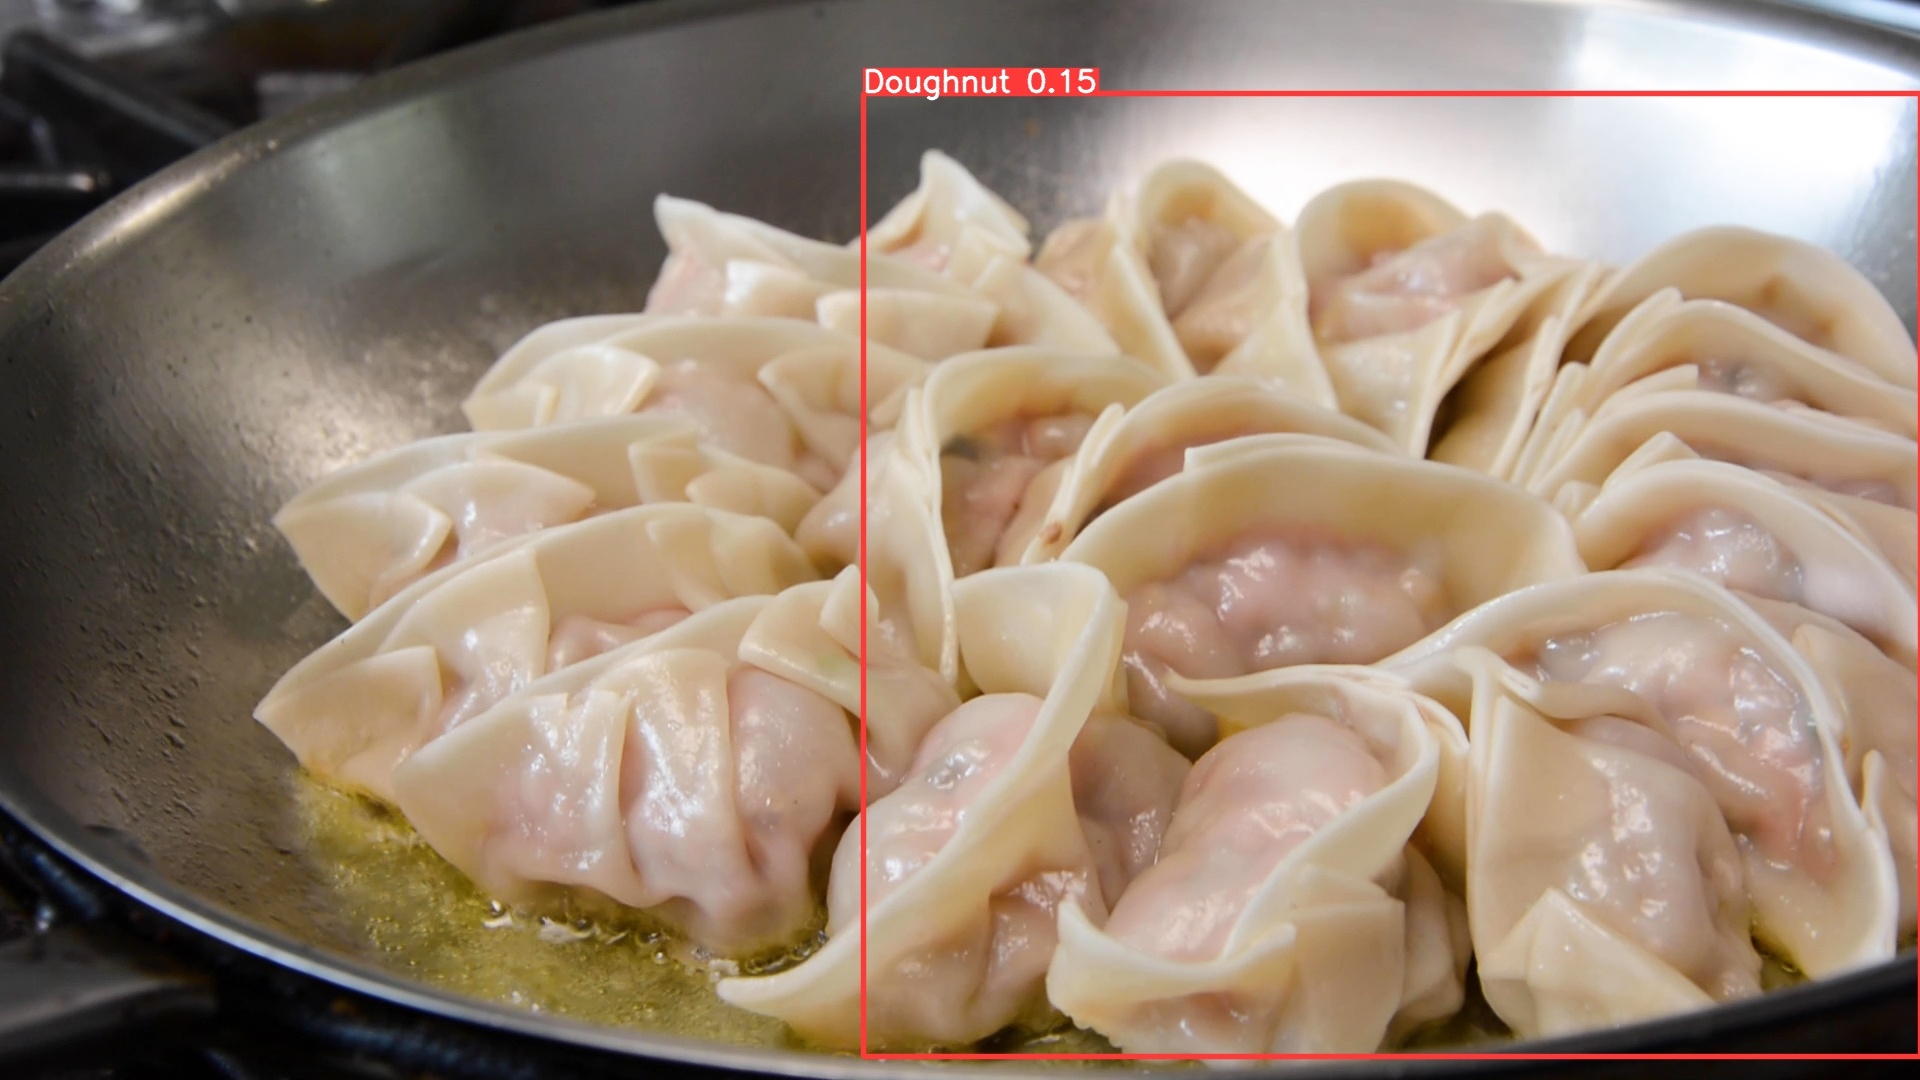

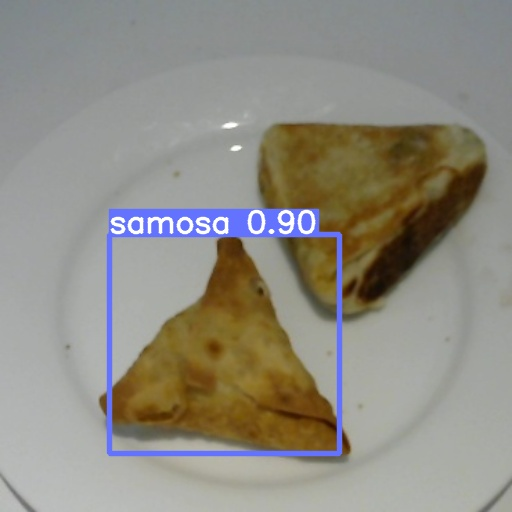

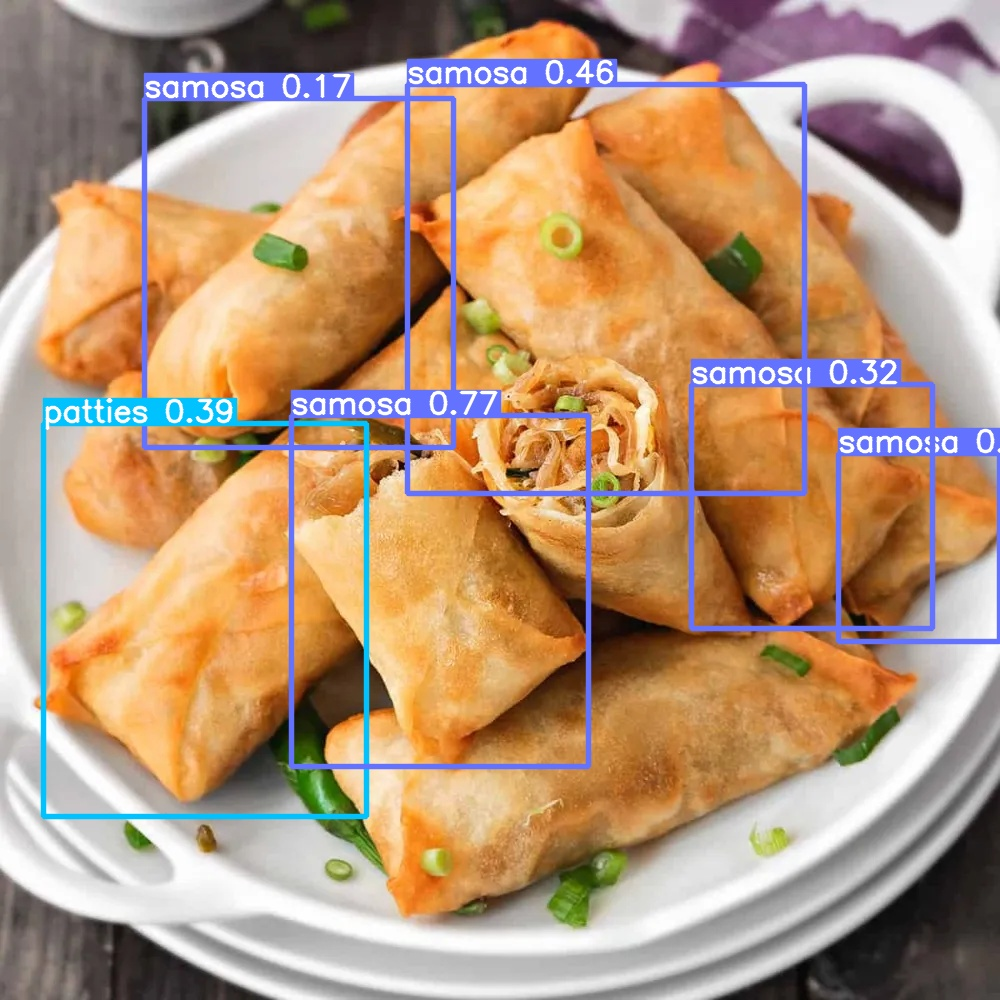

In [46]:
disp_infer(10)

# Visualization

In [11]:
!pip install tensorboard

In [14]:
%ls runs/train

yolov5s_results/


In [4]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir "runs"

In [17]:
%ls

CITATION.cff               __pycache__/   hubconf.py        train.py
CONTRIBUTING.md            benchmarks.py  models/           tutorial.ipynb
Food-Object-Detection--1/  classify/      requirements.txt  utils/
LICENSE                    data/          runs/             val.py
README.md                  detect.py      segment/          yolov5s.pt
README.zh-CN.md            export.py      setup.cfg


## if the tensor board isn't working for whatever reason... 

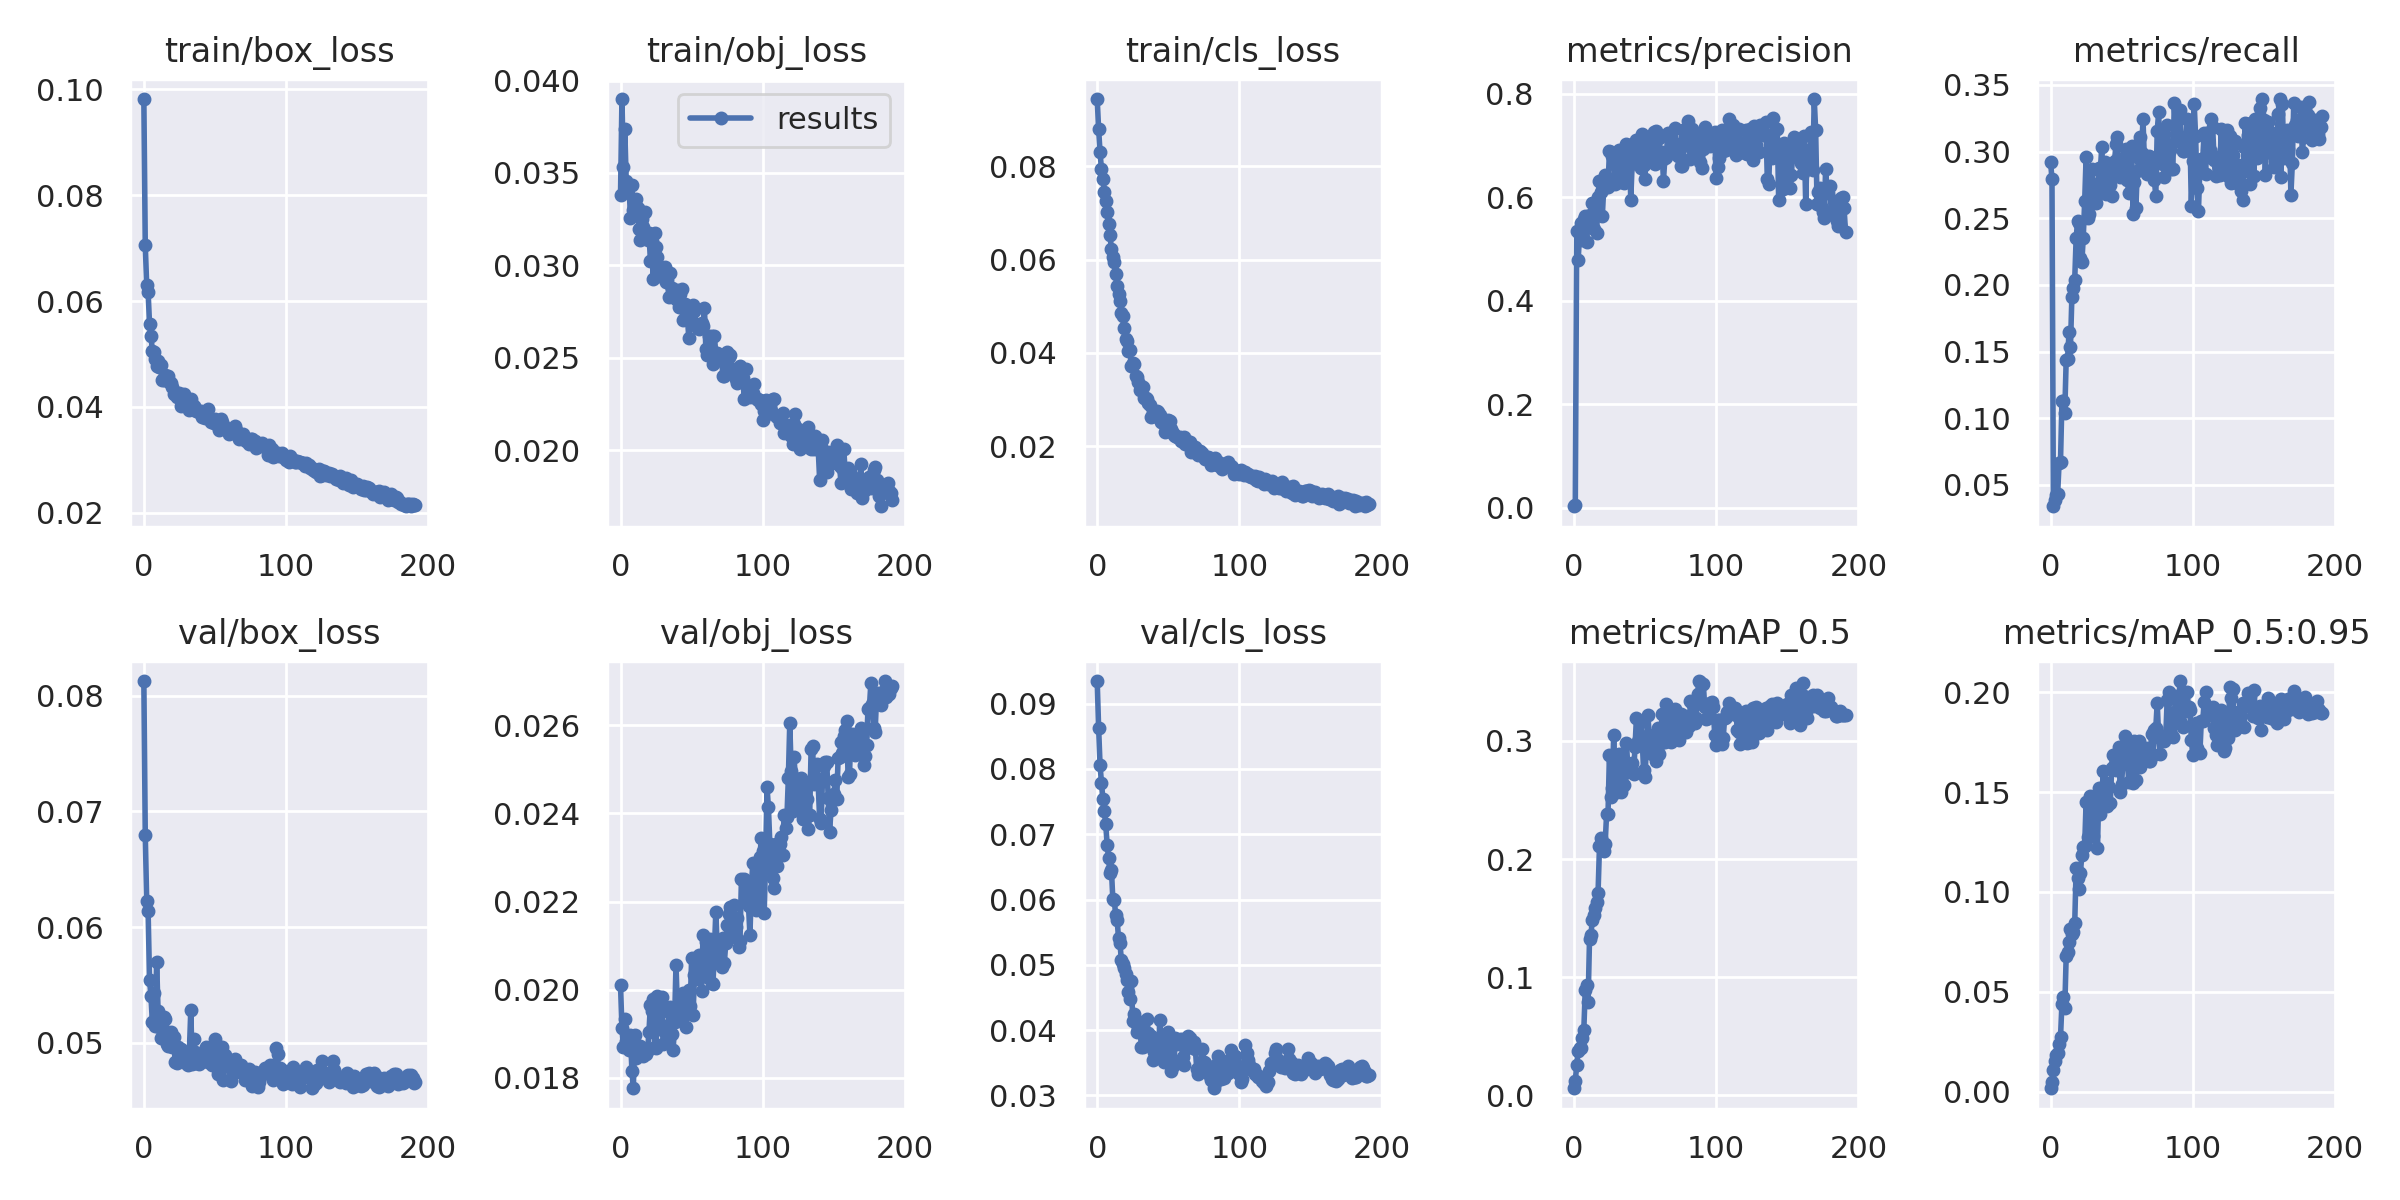

In [18]:
from utils.plots import plot_results # plot results.txt as results.png
Image(filename='runs/train/yolov5s_results/results.png', width=1000)  # view results.png

# Object Detection

In [43]:
def occlusion_test_set (ws, img_res, cnf, src):
    %cd /home/jupyter/yolov5
    !python detect.py --weights {ws} --img {img_res} --conf {cnf} --source {src} --save-txt

In [25]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.1 --source /home/jupyter/roboflow_test

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/home/jupyter/roboflow_test, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-48-g5f8054c Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla V100-SXM2-16GB, 16161MiB)

Fusing layers... 
Model summary: 157 layers, 7123399 parameters, 0 gradients, 16.1 GFLOPs
image 1/20 /home/jupyter/roboflow_test/00.jpg: 256x416 1 chicken quesadilla, 1 nachos, 1 pancakes, 19.9ms
image 2/20 /home/jupyter/roboflow_test/0FNSZ.jpg: 416x416 1 eggplant, 1 hummus, 1 samosa, 13.4ms
image 3/20 /home/jupyter/roboflow_test/0GYFO.jpg: 416x416 1 samosa, 1 spring rolls, 13.0ms
image 4/20 /home/jupyter/rob

In [19]:
def disp_infer (exp_no):
    #display inference on ALL test images
    import glob
    from IPython.display import Image, display
    
    for imageName in glob.glob("runs/detect/exp"+ str(exp_no)+ "/*.jpg"): #assuming JPG
        display (Image(filename=imageName))
        print("\n")

In [48]:
# from utils.plots import plot_results
# plot_results('runs/train/yolov5s_results/results.csv')

# Hyperparameter Tuning 

conf 0.4


In [8]:
#hyperparameter changer
def hyp_change ():
    #%%time
    %cd /home/jupyter/yolov5
    img_size = [416, 640]
    b_size = [8, 16, 32]
    for iz in img_size:
        for bz in b_size:
            print(f"====================CONFIG: {iz}, {bz} ===============================")
            !python train.py --img {iz} --batch {bz} --epochs 3 --data /home/jupyter/currymuch/datasets/uecfood100-shorteats/data.yaml --cfg ./models/yolov5s.yaml --weights runs/train/yolov5s_results10/weights/best.pt --name yolov5s_hyper_results  --cache --freeze 10

In [9]:
hyp_change()

/home/jupyter/yolov5
====================GONFIG: 416, 8 ===============================
wandb: Currently logged in as: rukshankr (fit-afr). Use `wandb login --relogin` to force relogin
train: weights=runs/train/yolov5s_results10/weights/best.pt, cfg=./models/yolov5s.yaml, data=/home/jupyter/currymuch/datasets/uecfood100-shorteats/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=8, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_hyper_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-53-g65071da Python-3.7.12 t

### Hyperparameter Evolution

In [14]:
!python train.py --img 416 --batch 16 --epochs 200 --data /home/jupyter/currymuch/datasets/AFR-1/data.yaml --cfg ./models/yolov5s.yaml --weights runs/train/yolov5s_results10/weights/best.pt --name yolov5s_evol_results --cache --patience 250 --freeze 10 --evolve 2

wandb: Currently logged in as: rukshankr (fit-afr). Use `wandb login --relogin` to force relogin
train: weights=runs/train/yolov5s_results10/weights/best.pt, cfg=./models/yolov5s.yaml, data=/home/jupyter/currymuch/datasets/AFR-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=2, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_evol_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=250, freeze=[10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-53-g65071da Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla V100-SXM2-16GB, 16161MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937

# Segmentation 

## with YOLO

In [35]:
%ls Food-Object-Detection--1/test

images/  labels/


In [ ]:
!python segment/predict.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.1 --source /home/jupyter/roboflow_test

## ML

### Graph Cut
https://sandipanweb.wordpress.com/2018/02/11/interactive-image-segmentation-with-graph-cut/



### K-MEans
https://www.kaggle.com/code/naim99/knn-image-segmentation/notebook
https://github.com/xiaoyu-z/KNN-segmentation/blob/master/segmentation.py



(512, 512, 3)


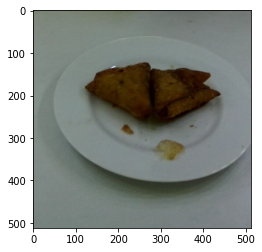

In [95]:
pic = plt.imread('/home/jupyter/roboflow_test/0GYFO.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [96]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(262144, 3)

In [99]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

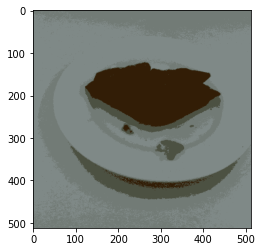

In [100]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

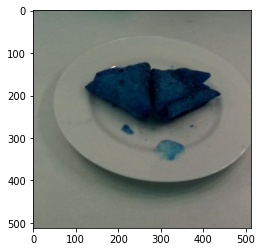

In [93]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/home/jupyter/roboflow_test/0GYFO.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
dst = cv2.Canny(gray, 0, 150)
blured = cv2.blur(dst, (5,5), 0)    
MIN_CONTOUR_AREA=200
img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
Contours,imgContours = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# for contour in Contours:
#     if cv2.contourArea(contour) > MIN_CONTOUR_AREA:
#         [X, Y, W, H] = cv2.boundingRect(contour)
#         box=cv2.rectangle(img, (X, Y), (X + W, Y + H), (0,0,255), 2)
#         cropped_image = img[Y:Y+H, X:X+W]
#         print([X,Y,W,H])
#         plt.imshow(cropped_image)
#         cv2.imwrite('xxx.png', cropped_image)
plt.imshow(img)

In [48]:
%ls

CITATION.cff               benchmarks.py  requirements.txt  val.py
CONTRIBUTING.md            classify/      runs/             wandb/
Food-Object-Detection--1/  data/          segment/          xxx.png
LICENSE                    detect.py      setup.cfg         yolov5s.pt
README.md                  export.py      train.py
README.zh-CN.md            hubconf.py     tutorial.ipynb
__pycache__/               models/        utils/


### Cropping


In [78]:
# import os 

# name = "0GYFO"
# ext = ".jpg"
# imgname =  name + ext
# dyr = "/home/jupyter/yolov5/runs/detect/exp10/labels"
# imgdyr = "/home/jupyter/yolov5/runs/detect/exp10"

# img = cv2.imread(os.path.join(imgdyr,imgname))
# plt.imshow(img)

In [79]:
# import math

# # Using readlines()
# file1 = open(os.path.join(dyr, name) + '.txt', 'r')
# Lines = file1.readlines()

# boxes = []
# crops = []

# for i in range(0,len(Lines)):
#     coords = Lines[i].split()
#     X, Y, W, H = float(coords[1]), float(coords[2]), float(coords[3]), float(coords[4])
#     print(X,Y,W,H)
#     X, Y, W, H = math.floor(X*255),math.floor(X*255),math.floor(X*255),math.floor(X*255)
#     print(X,Y,W,H)
#     crops[i] = img[Y:Y + H, X:X + W]
#     plt.imshow(crops[i])

# # box=cv2.rectangle(img, (X, Y), (X + W, Y + H), (0,0,255), 2)
# # cropped_image = img[Y:Y + H, X:X + W]
# # print([X,Y,W,H])
# # plt.imshow(cropped_image)
# # cv2.imwrite(os.path.join(dyr,'xxx.png'), cropped_image)

# Visualization

In [ ]:
# !pip install clearml

# %env CLEARML_WEB_HOST=https://app.clear.ml
# %env CLEARML_API_HOST=https://api.clear.ml
# %env CLEARML_FILES_HOST=https://files.clear.ml
# %env CLEARML_API_ACCESS_KEY=25XN7C9PKVM9WJVIW14O
# %env CLEARML_API_SECRET_KEY=5XHslNs4yqv9qGqkzSo9iPRinMRsQ9pb7oVrVxTU9nWIAYI3kx

# from clearml import Task
# task = Task.init(project_name="afr_contr", task_name="my task 1")


In [7]:
import wandb

wandb.init(project="test-project", entity="fit-afr")

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Evaluation

In [3]:
!pip install wandb

In [4]:
import wandb

wandb.init(project="interim-project", entity="fit-afr")

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train